In [4]:
%matplotlib inline
import matplotlib as mpl
from matplotlib import pyplot as plt
from matplotlib import colors

In [1]:
import os
import fnmatch
import numpy as np
import pandas as pd
import scipy as sp
import palettable as pbl
import h5py

from isanaht import plot_helper as ph

/Users/thanasi/anaconda/lib/python3.4/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [2]:
cmap7 = pbl.colorbrewer.get_map('Set1', 'Qualitative', 7)
cmap11 = pbl.colorbrewer.get_map('Paired', 'Qualitative', 12)
c11s = cmap11.hex_colors
c11s = c11s[1::2] + c11s[::2] # unpair them

In [5]:
mpl.rc('image', cmap='coolwarm', interpolation='nearest')
mpl.rc('font', family='STIXGeneral')
mpl.rc('legend', fancybox=False, numpoints=1, markerscale=1.5, borderaxespad=0.5, fontsize=16)
mpl.rc('figure', figsize=(8,8))
mpl.rc('axes', linewidth=1.5, edgecolor='k', labelsize=22, grid=False, axisbelow=True,
        prop_cycle= mpl.cycler(color=c11s))
mpl.rc('grid', linewidth=1)
mpl.rc('ytick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick.major', size=5, width=1.5, pad=8)
mpl.rc('xtick', labelsize=18)
mpl.rc('ytick', labelsize=18)
mpl.rc('lines', linewidth=2)

In [6]:
def get_pos_finite(arr):
    a = arr[np.isfinite(arr)]
    return arr[arr>0]

---

## Unperturbed Band Structure 

In [72]:
output_dir = './out/straight/bands/multi-k/'

In [73]:
eps_lo = 1
eps_hi = 12
omega0 = 0.25
lmbda0 = 2*np.pi / omega0
lmbda_hi = lmbda0 / eps_hi
res = 30

sx = 1
sy = 8

print(res/lmbda_hi, "px/wavelength")

14.323944878270582 px/wavelength


In [74]:
X_max = sx / 2
X_min = - X_max
Y_max = sy / 2
Y_min =  - Y_max


with h5py.File(output_dir + 'straight-bands-eps-000000.00.h5', 'r') as eps_file:
    epsilon = eps_file["eps"].value.T
    nX = epsilon.shape[1]
    X = np.mgrid[-X_max:X_max:1j*nX]

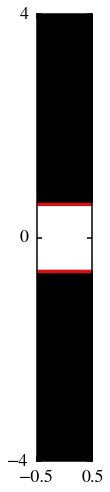

In [75]:
fig,ax = plt.subplots()
ax.imshow(epsilon, extent=(X_min,X_max, Y_min, Y_max), cmap=plt.cm.gray);
ax.contour(epsilon, [5], extent=(X_min, X_max, Y_min, Y_max), colors='r', linewidths=3);
ax.set_aspect('equal');
ax.set_xticks([X_min, X_max]);
ax.set_yticks([Y_min, 0, Y_max]);

In [13]:
freqs_re = pd.read_csv(output_dir+'fre.out', header=None, index_col=0, usecols=range(2,11))
freqs_im = pd.read_csv(output_dir+ 'fim.out', header=None, index_col=0, usecols=range(2,11))

In [14]:
get_pos_finite(freqs_re.loc[0.0].values)

array([ 0.31119479,  0.45423614])

In [109]:
from mpl_toolkits.axes_grid1 import inset_locator

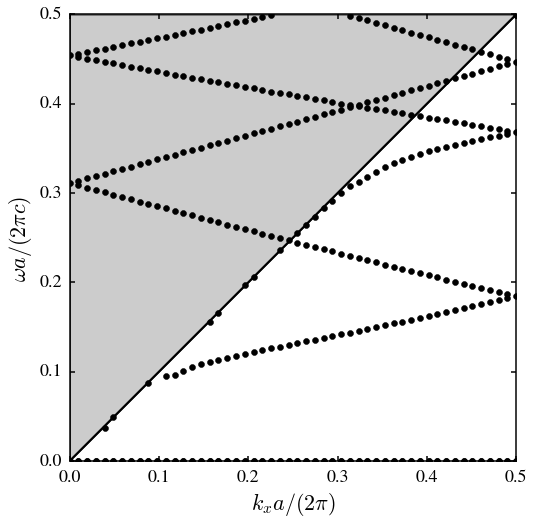

In [15]:
fig,ax = plt.subplots()
freqs_re.plot(ax=ax, c='k', marker='o', linestyle='', legend=None);
k0 = [0,0.5]
ax.plot(k0,k0,c='k');
ax.fill_betweenx(k0, k0, facecolor='#cccccc', zorder=-1);
# ax.axhline(0.4528543062578309, c='k', lw=3)
ax.set_xlabel("$k_x a / (2 \pi)$");
ax.set_ylabel("$\omega a / (2 \pi c)$");

---

## Time-Domain Analysis of Radiating Modes

In [82]:
output_dir = './out/straight/radiation/'

In [83]:
eps_lo = 1
eps_hi = 12
omega0 = 0.25
lmbda0 = 2*np.pi / omega0
lmbda_hi = lmbda0 / eps_hi
res = 30

sx = 16
sy = 8

print(res/lmbda_hi, "px/wavelength")

14.323944878270582 px/wavelength


In [84]:
X_max = sx // 2
X_min = - X_max
Y_max = sy //2
Y_min =  - Y_max


with h5py.File(output_dir+'straight-wvg-eps-000000.00.h5', 'r') as eps_file:
    epsilon = eps_file["eps"].value.T
    nX = epsilon.shape[1]
    X = np.mgrid[-X_max:X_max:1j*nX]

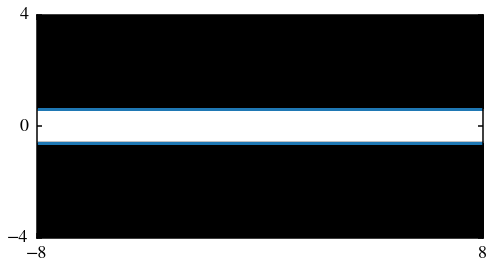

In [103]:
fig,ax = plt.subplots()
ax.imshow(epsilon, extent=(X_min,X_max, Y_min, Y_max), cmap=plt.cm.gray);
ax.contour(epsilon, [5], extent=(X_min, X_max, Y_min, Y_max), colors=c11s[0], linewidths=3);
ax.set_aspect('equal');
ax.set_xticks([X_min, X_max]);
ax.set_yticks([Y_min, 0, Y_max]);

In [86]:
ldos = pd.read_csv(output_dir+'/ldos.out', 
                   header=None, index_col=0, usecols=[1,2],
                  names=['freq', 'ldos'])
ldos = ldos[0:0.5]

In [87]:
fluxes = pd.read_csv(output_dir+'/fluxes.out',
                     header=None, index_col=0, usecols=[1,2,3,4,5],
                     names=["freq", "top", "right","bottom","left"])

fluxes=fluxes[0:0.5]

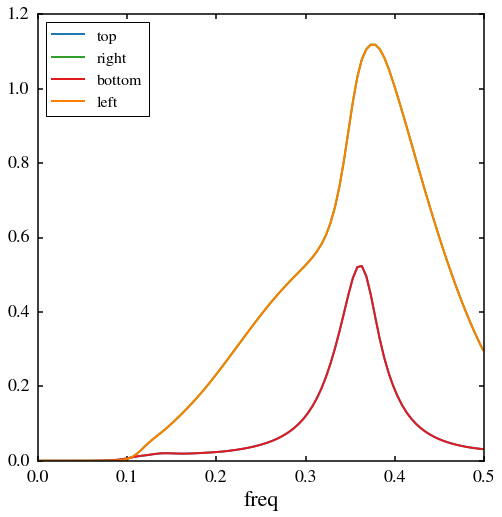

In [88]:
flx2 = np.abs(fluxes)
fig,ax = plt.subplots()
# ax.plot(fluxes, 'o-');
# ax.set_ylim(0,None);
# ax.axhline(0.25, ls='--', c='k');
flx2.plot(ax = ax);
ax.set_xlim(0,0.5);

In [23]:
ratio = (flx2["top"] + flx2["bottom"]) / (flx2.sum(axis=1))
# ratio.loc[np.isclose(flx2.sum(axis=1), 0, atol=1e-3)] = np.nan

In [24]:
np.argmax(ratio.values)

1

In [25]:
np.pi/sx

0.19634954084936207

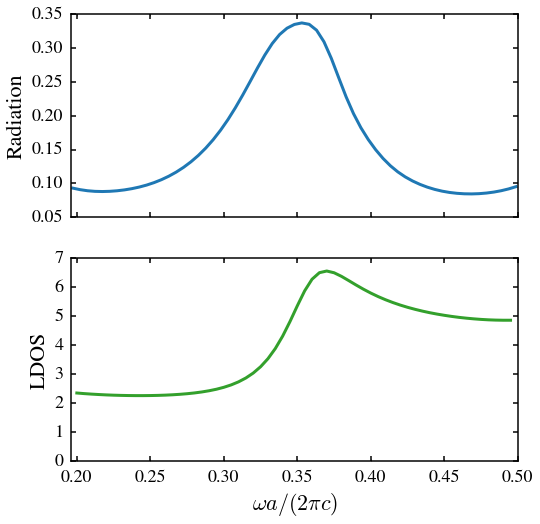

In [26]:
fig,axs = plt.subplots(2,1, sharex=True);
ax,ax1=axs

ax1.plot([0])

ratio[np.pi/sx:0.5].plot(ax=ax, lw=3);
ax.set_ylabel("Radiation")
# omega1 = flx2.iloc[np.argmax(ratio.values)].name

ldos[np.pi/sx:0.5].plot(ax=ax1, lw=3, legend=None);
ax1.set_ylabel("LDOS")
ax1.set_xlabel("$\omega a / (2 \pi c)$")

# ax.axvline(omega1, c='k', ls='--',zorder=-3);
# print(omega1)
ax.set_xlim(np.pi/sx,0.5);


---


In [29]:
output_dir = './out/straight/bands/multi-k/'

In [30]:
freqs_re = pd.read_csv(output_dir+'fre.out', header=None, index_col=0, usecols=range(2,11))
freqs_im = pd.read_csv(output_dir+ 'fim.out', header=None, index_col=0, usecols=range(2,11))

ks = freqs_re.index.values

amps = pd.DataFrame( columns=['k','omega', 'amp'], dtype=np.float32)

j=0

for i,k in enumerate(ks):
    df = pd.read_csv(output_dir+'harminv%02d.out' % i, 
                     header=0, index_col=0, usecols=[1,4], 
                     skipinitialspace=True)
    
    omegas = df.index.values.astype(np.float32)
    ampls = df.loc[:,'|amp|'].values.astype(np.float32)
    
    for o,a in zip(omegas, ampls):
        amps.loc[j,'k'] = k
        amps.loc[j,'omega'] = o
        amps.loc[j,'amp'] = a
        j = j+1


In [31]:
ks.max()

0.5

In [32]:
def gaussian(xs, mean, s):
    return np.exp( (xs-mean)**2 / (2*s**2 ))

In [34]:
ld = ldos.values

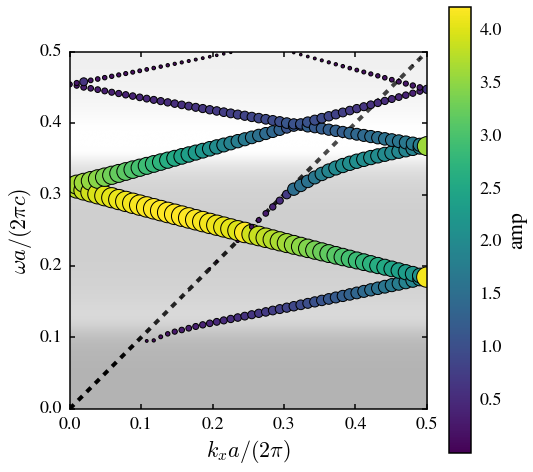

In [100]:
fig,ax = plt.subplots()
ax.plot([0,0.5],[0,0.5],'k--', lw=4,zorder=-4);
amps.plot(kind='scatter', ax=ax, 
          x='k', y='omega',
          c='amp', s=amps['amp']*100,
          cmap=plt.cm.viridis,
          legend=False)
ax.set_xlim(0,0.5);
ax.set_ylim(0,0.5);
ax.set_xlabel('$k_x a / (2\pi)$');
ax.set_ylabel('$\omega a / (2\pi c)$');
ax.set_aspect('equal');
plt.imshow(ld.repeat(100,axis=1), extent=(0,0.5,0.5,0), cmap=plt.cm.gray, alpha=0.3, 
           vmin=0, vmax=6, interpolation='bicubic');


---


In [36]:
output_dir = './out/straight/bands/'

In [37]:
kfolders = os.listdir(output_dir)
kfolders = fnmatch.filter(kfolders, 'k*')
parse_k = lambda s: float(s[1:])
ks = list(map(parse_k, kfolders))

In [38]:
omegas = pd.read_csv(output_dir+kfolders[0]+'/fluxes.out',
                     header=None,  usecols=[1],
                     names=["freq"])["freq"].values

In [45]:
kpwr = pd.Panel(0,items=ks, major_axis=omegas, minor_axis=['top', 'right', 'bottom', 'left'])
kpwr.items.set_names('k', inplace=True)
kpwr.major_axis.set_names('freq', inplace=True)

In [48]:
(kpwr.values==0).all()

True

In [53]:
for k, kf in zip(ks,kfolders):
    pwr = pd.read_csv(output_dir + kf + '/fluxes.out',
                      header=None, index_col=0, usecols=[1,2,3,4,5],
                      names=['freq', 'top','right','bottom','left'])
    
    kpwr.loc[k,:,:] = pwr.values

In [54]:
np.isnan(kpwr.values).all()

False

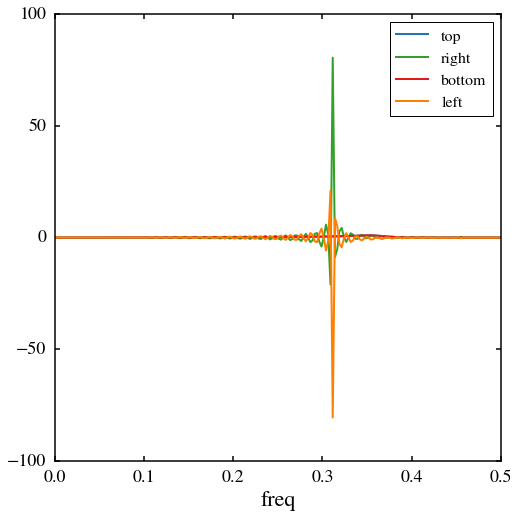

In [55]:
kpwr[0].plot()

In [56]:
kpwr_all = kpwr.sum(axis=2)

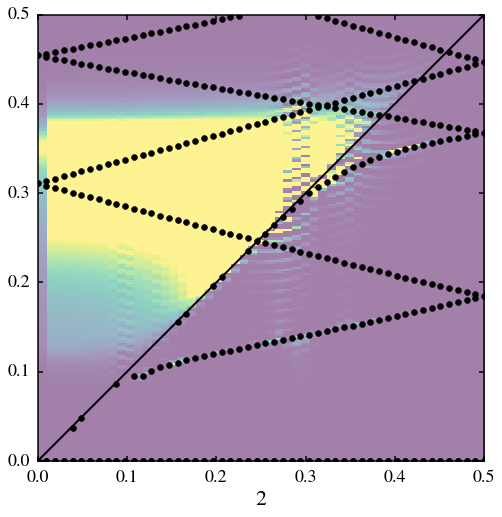

In [101]:
fig,ax = plt.subplots()
plt.imshow(kpwr.sum(2), extent=(0,0.5,0.5,0), cmap=plt.cm.viridis, vmin=0, vmax=2, alpha=0.5)
ax.plot([0,0.5],[0,0.5], 'k-');
ax.set_ylim(0,0.5);
freqs_re.plot(ax=ax, c='k', marker='o', linestyle='', legend=None);

---

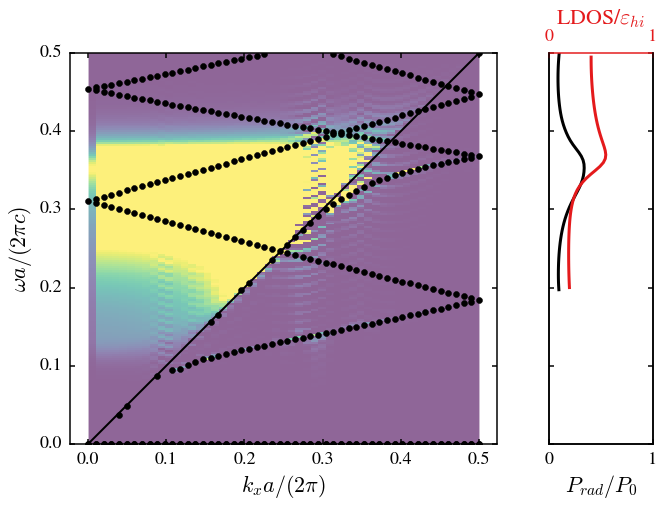

In [102]:
fig = plt.figure(figsize=(9,7))

gs1 = mpl.gridspec.GridSpec(1,1)
gs1.update(left=0.05, right=0.71, wspace=0.05)
gs2 = mpl.gridspec.GridSpec(1,1)
gs2.update(left=0.79, right=0.95, wspace=0.5)

ax1 = plt.subplot(gs1[:,:])
ax2 = plt.subplot(gs2[:,:], sharey=ax1)
ax3 = ax2.twiny()
plt.setp(ax2.get_yticklabels(), visible=False)

# ratio.plot(ax=ax2, lw=3);
r = ratio[np.pi/sx:0.5]
ax2.plot(r.values, r.index, 'k', lw=3)

ax2.set_xticks([0,0.5,1]);
ax2.set_xlim(0,1);

c3 = cmap7.mpl_colors[0]
l = ldos[np.pi/sx:0.5]
ax3.plot(l.values/eps_hi, l.index, c=c3, lw=3)
ax3.set_xlim(0,1);
ax3.set_xticks([0,1]);
ax3.set_xlabel("LDOS/"r'$\varepsilon_{hi}$');

for obj in ax3.get_xticklabels() + [ax3.spines['top'], ax3.xaxis.label] + ax3.get_xticklines():
    obj.set_color(c3)
    obj.set_zorder(2)

ax2.spines['top'].set_visible(False)
ax2.set_xticks([0,1]);
ax2.set_xlabel("$P_{rad} / P_0$");


freqs_re.plot(ax=ax1, c='k', marker='o', linestyle='', legend=None);
k0 = [0,0.5]
ax1.plot(k0,k0,c='k');
# ax1.fill_betweenx(k0, k0, facecolor='#cccccc', zorder=-1);
ax1.imshow(kpwr.sum(2), extent=(0,0.5,0.5,0), cmap=plt.cm.viridis, vmin=0, vmax=2, alpha=0.6)
ax1.set_ylim(0,0.5);
ax1.set_xlim(0,0.5);
ax1.set_aspect('equal');
# ax.axhline(0.4528543062578309, c='k', lw=3)
ax1.set_xlabel("$k_x a / (2 \pi)$");
ax1.set_ylabel("$\omega a / (2 \pi c)$");